| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./5_Machine_Learning.ipynb)| [⏩](./7_Machine_Learning.ipynb)|

# **51. Regresión polinomial**

La regresión polinomial es una técnica de regresión que modela la relación entre la variable independiente $(X)$ y la variable dependiente $(y)$ como un polinomio de grado $(n)$. Esta técnica permite capturar relaciones no lineales entre las variables y ajustarse mejor a patrones complejos en los datos. A continuación, proporcionaré una explicación detallada con ejemplos en código y visualización.

**Regresión Polinomial: Explicación Detallada**

1. **Función del Modelo:**
   La función del modelo en la regresión polinomial tiene la forma:
   $h_\theta(X) = \theta_0 + \theta_1 \cdot X + \theta_2 \cdot X^2 + \ldots + \theta_n \cdot X^n$
   Donde $(n)$ es el grado del polinomio.

2. **Entrenamiento del Modelo:**
   Similar a la regresión lineal, los parámetros $(\theta)$ se entrenan utilizando el método de mínimos cuadrados o algún otro método de optimización.

3. **Preprocesamiento de Datos:**
   Antes de aplicar la regresión polinomial, es común realizar el preprocesamiento de datos, incluida la adición de características polinomiales a la matriz de características $(X)$. Esto implica elevar cada característica a las potencias del 1 al $(n)$.

4. **Sobreajuste (Overfitting):**
   A medida que se aumenta el grado del polinomio, el modelo se vuelve más flexible y puede ajustarse demasiado a los datos de entrenamiento. Es importante tener cuidado con el sobreajuste y elegir el grado del polinomio de manera adecuada.

**Ejemplo en Código con Visualización**

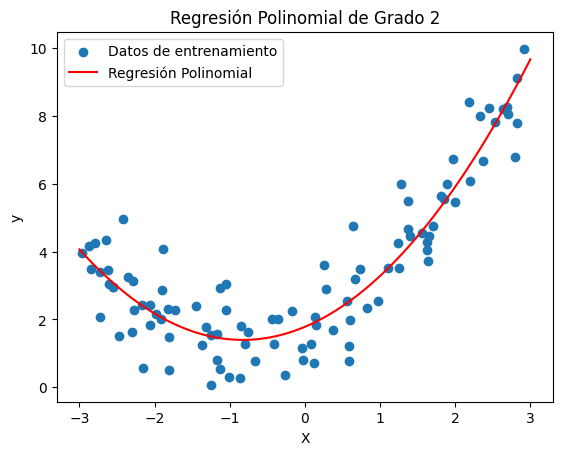

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generar datos de ejemplo
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Aplicar regresión polinomial de grado 2
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)

# Visualización de datos y regresión polinomial
X_test = np.linspace(-3, 3, 100).reshape(100, 1)
y_pred = model.predict(X_test)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_test, y_pred, label='Regresión Polinomial', color='red')
plt.title('Regresión Polinomial de Grado 2')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

En este ejemplo, generamos datos cuadráticos de ejemplo y aplicamos una regresión polinomial de grado 2 utilizando la biblioteca scikit-learn. La visualización muestra cómo el modelo de regresión polinomial se ajusta a la relación cuadrática en los datos de entrenamiento. Puedes ajustar el grado del polinomio cambiando el parámetro `degree` en `PolynomialFeatures`. Es importante recordar que un grado demasiado alto puede conducir a sobreajuste.

# **52. Bias Variance Trade-off | Overfitting and Underfitting in Machine Learning**

**Bias-Variance Trade-off, Overfitting, y Underfitting en Machine Learning**

El *Bias-Variance Trade-off* es un concepto fundamental en Machine Learning que se relaciona con los errores que un modelo puede cometer al generalizar desde los datos de entrenamiento a datos no vistos. Este trade-off se refiere a la compensación entre dos tipos de errores: el error de sesgo (bias) y el error de varianza.

1. **Error de Sesgo (Bias):**
   - **Definición:** Representa el error sistemático introducido por aproximaciones simplificadas en el modelo. Modelos con alto sesgo tienden a subestimar la complejidad de los datos.
   - **Efecto:** Puede llevar a un modelo que es demasiado simple y no se ajusta bien a los datos de entrenamiento.
   - **Solución:** Aumentar la complejidad del modelo, por ejemplo, usando modelos más avanzados.

2. **Error de Varianza:**
   - **Definición:** Representa cuánto varía la predicción del modelo para diferentes conjuntos de datos. Modelos con alta varianza son muy sensibles a las fluctuaciones en los datos de entrenamiento.
   - **Efecto:** Puede llevar a un modelo que se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.
   - **Solución:** Reducir la complejidad del modelo o usar técnicas de regularización.

3. **Overfitting (Sobreajuste):**
   - **Definición:** Ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, capturando ruido y patrones no representativos.
   - **Efecto:** Mala generalización a nuevos datos.
   - **Solución:** Reducir la complejidad del modelo, aumentar el tamaño de los datos de entrenamiento o usar técnicas de regularización.

4. **Underfitting (Subajuste):**
   - **Definición:** Ocurre cuando un modelo es demasiado simple para capturar la complejidad de los datos.
   - **Efecto:** Mala capacidad de adaptación a los datos de entrenamiento.
   - **Solución:** Aumentar la complejidad del modelo.

**Ejemplo en Código y Visualización**

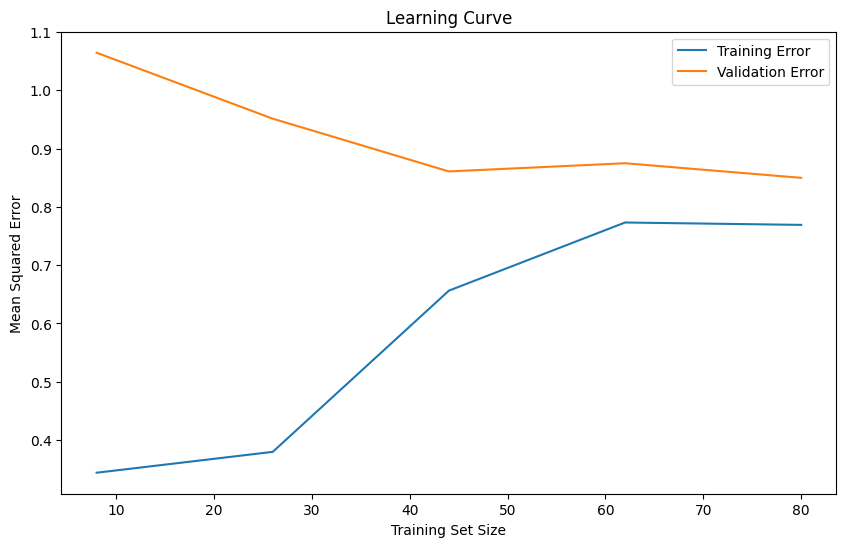

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Generar datos de ejemplo
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Función para visualizar curvas de aprendizaje
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes, test_scores_mean, label='Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Regresión lineal de grado 2
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
plot_learning_curve(model, X, y)

Este código utiliza un modelo de regresión polinomial de grado 2 para ilustrar la relación entre el sesgo y la varianza. La función `plot_learning_curve` muestra cómo cambian los errores de entrenamiento y validación a medida que se aumenta el tamaño del conjunto de entrenamiento. Un aumento en el error de validación en comparación con el error de entrenamiento indica mayor varianza y posiblemente overfitting. Ajustar la complejidad del modelo puede ayudar a encontrar un equilibrio entre bias y variance.

# **53. Regresión de crestas| Intuición geométrica y código | Modelos lineales regularizados**

**Regresión de Ridge (Ridge Regression) - Intuición geométrica y código**

La regresión de Ridge es un modelo lineal regularizado que se utiliza para abordar el problema de la multicolinealidad en la regresión lineal. La multicolinealidad ocurre cuando hay fuertes correlaciones entre las variables predictoras, lo que puede hacer que los coeficientes estimados sean inestables.

**Intuición geométrica:**
En lugar de simplemente minimizar la suma de los cuadrados de los residuos (como en la regresión lineal clásica), la regresión de Ridge también busca minimizar una penalización proporcional al cuadrado de los coeficientes. Esto se puede visualizar en un contexto bidimensional.

En el caso bidimensional, la regresión de Ridge busca minimizar la suma de los cuadrados de los residuos (distancia vertical al plano) y al mismo tiempo mantener los coeficientes lo más pequeños posible (distancia horizontal desde el origen). Esto se traduce en un ajuste más suave y menos propenso a fluctuaciones extremas en los datos.

**Ejemplo en Código y Visualización:**

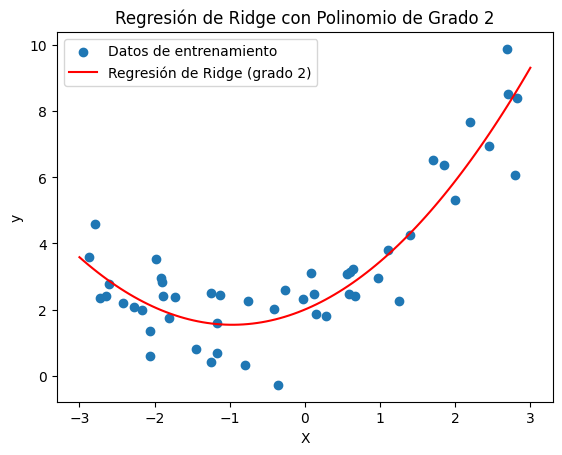

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generar datos de ejemplo
np.random.seed(42)
X = 6 * np.random.rand(50, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(50, 1)

# Regresión de Ridge con polinomio de grado 2
ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, random_state=42))
ridge_model.fit(X, y)

# Visualizar el ajuste del modelo
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = ridge_model.predict(X_range)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_pred, color='red', label='Regresión de Ridge (grado 2)')
plt.title('Regresión de Ridge con Polinomio de Grado 2')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

En este ejemplo, se genera un conjunto de datos cuadrático y se aplica la regresión de Ridge con un polinomio de grado 2. La penalización controlada por el parámetro `alpha` ayuda a suavizar el ajuste y evitar coeficientes excesivamente grandes.

Este es solo un ejemplo básico, y el rendimiento de la regresión de Ridge puede variar según la naturaleza específica de los datos y el valor de `alpha`. Experimentar con diferentes valores de `alpha` es importante para encontrar el equilibrio adecuado entre sesgo y varianza.

# **54. Regresión de crestas | Formulación Matemática y Código desde cero | Modelos lineales regularizados**

**Regresión de Ridge (Regresión de Crestas) - Formulación Matemática y Código desde Cero**

La regresión de Ridge es un modelo lineal regularizado que agrega una penalización a la magnitud de los coeficientes para abordar el problema de la multicolinealidad. La formulación matemática de la regresión de Ridge se expresa como la minimización de la siguiente función de costo:

$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$

Donde:
- $J(\theta)$ es la función de costo regularizada.
- $\text{MSE}(\theta)$ es el error cuadrático medio convencional.
- $(\alpha)$ es el parámetro de regularización que controla la fuerza de la penalización.
- $(\theta_i)$ son los coeficientes del modelo.

La adición del término $(\alpha \sum_{i=1}^{n} \theta_i^2)$ penaliza los coeficientes grandes, lo que ayuda a suavizar el modelo y evitar la sobreajuste.

**Código desde Cero:**

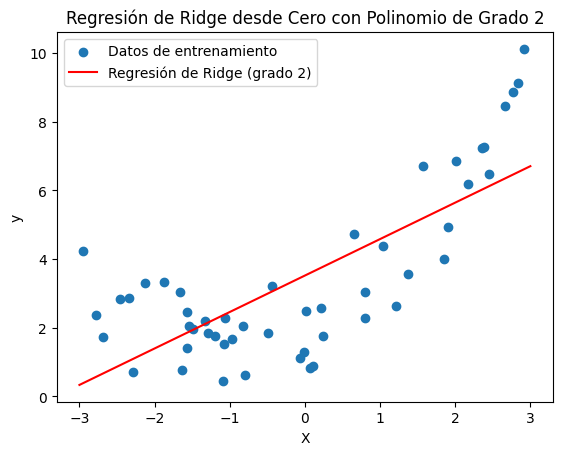

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_regression(X, y, alpha):
    m, n = X.shape
    # Añadir una columna de unos a X para el término de sesgo
    X_b = np.c_[np.ones((m, 1)), X]
    # Calcular la solución de forma cerrada
    A = np.eye(n + 1)
    A[0, 0] = 0  # No penalizar el término de sesgo
    theta = np.linalg.inv(X_b.T.dot(X_b) + alpha * A).dot(X_b.T).dot(y)
    return theta

def generate_polynomial_data(m, degree):
    X = 6 * np.random.rand(m, 1) - 3
    y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
    return X, y

# Parámetros del modelo y datos de ejemplo
alpha = 1
degree = 2
m = 50

# Generar datos de ejemplo
X, y = generate_polynomial_data(m, degree)

# Aplicar regresión de Ridge
theta_ridge = ridge_regression(X, y, alpha)

# Visualizar el ajuste del modelo
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_b = np.c_[np.ones((100, 1)), X_range]
y_pred_ridge = X_range_b.dot(theta_ridge)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_pred_ridge, color='red', label='Regresión de Ridge (grado 2)')
plt.title('Regresión de Ridge desde Cero con Polinomio de Grado 2')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Este código implementa la regresión de Ridge desde cero para un modelo de regresión polinómico de grado 2. La penalización se aplica a todos los coeficientes, excepto al término de sesgo $(\theta_0)$ El resultado es una regresión más suave que ayuda a evitar el sobreajuste, especialmente cuando hay multicolinealidad en los datos.

# **55. Regresión de crestas | Descenso de gradiente | Modelos lineales regularizados**

**Regresión de Ridge (Crestas) con Descenso de Gradiente**

La regresión de Ridge es un modelo lineal regularizado que introduce una penalización en la magnitud de los coeficientes para abordar el problema de la multicolinealidad. Podemos implementar la regresión de Ridge utilizando el descenso de gradiente. La función de costo para la regresión de Ridge es:

$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$

Donde:
- $J(\theta)$ es la función de costo regularizada.
- $\text{MSE}(\theta)$ es el error cuadrático medio convencional.
- $(\alpha)$ es el parámetro de regularización que controla la fuerza de la penalización.
- $(\theta_i)$ son los coeficientes del modelo.

El término adicional $(\alpha \sum_{i=1}^{n} \theta_i^2)$ penaliza los coeficientes grandes, evitando así el sobreajuste.

**Código con Descenso de Gradiente:**

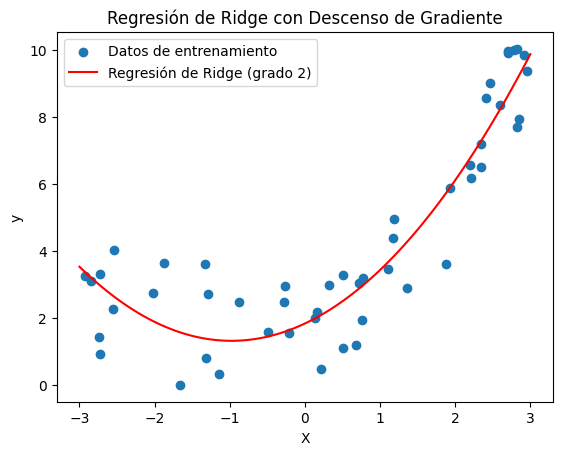

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_cost(X, y, theta, alpha):
    m = len(y)
    J = np.sum((X.dot(theta) - y)**2) / (2 * m) + alpha * np.sum(theta[1:]**2) / (2 * m)
    return J

def ridge_gradient(X, y, theta, alpha):
    m = len(y)
    gradients = X.T.dot(X.dot(theta) - y) / m
    gradients[1:] += (alpha / m) * theta[1:]
    return gradients

def ridge_gradient_descent(X, y, alpha, learning_rate, n_iterations):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    for iteration in range(n_iterations):
        gradients = ridge_gradient(X, y, theta, alpha)
        theta = theta - learning_rate * gradients
    return theta

def generate_polynomial_data(m, degree):
    X = 6 * np.random.rand(m, 1) - 3
    y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
    return X, y

# Parámetros del modelo y datos de ejemplo
alpha = 1
degree = 2
m = 50

# Generar datos de ejemplo
X, y = generate_polynomial_data(m, degree)

# Añadir términos de sesgo y grado polinómico
X_b = np.c_[np.ones((m, 1)), X, X**2]

# Aplicar descenso de gradiente para regresión de Ridge
theta_ridge = ridge_gradient_descent(X_b, y, alpha, learning_rate=0.01, n_iterations=1000)

# Visualizar el ajuste del modelo
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_b = np.c_[np.ones((100, 1)), X_range, X_range**2]
y_pred_ridge = X_range_b.dot(theta_ridge)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_pred_ridge, color='red', label='Regresión de Ridge (grado 2)')
plt.title('Regresión de Ridge con Descenso de Gradiente')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Este código implementa la regresión de Ridge utilizando descenso de gradiente. A medida que ajustamos el modelo, la penalización adicional ayuda a mantener los coeficientes en magnitudes más pequeñas, evitando así el sobreajuste. La visualización muestra el ajuste del modelo para datos de ejemplo con un polinomio de grado 2.

# **56. 5 puntos clave: regresión de crestas | Modelos lineales regularizados**

La regresión de crestas (o regresión Ridge) es una técnica de regresión lineal regularizada que introduce una penalización en la magnitud de los coeficientes del modelo para prevenir el sobreajuste. Aquí tienes una explicación detallada junto con un ejemplo en código y visualización.

**1. Concepto clave:**

En la regresión de crestas, además de minimizar la suma de los errores cuadráticos entre las predicciones del modelo y los valores reales, se agrega un término de penalización proporcional a la magnitud cuadrada de los coeficientes del modelo. La función de costo de la regresión de Ridge se define como:

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \alpha \sum_{j=1}^{n} \theta_j^2$

Donde:
- $J(\theta)$ es la función de costo.
- $(m)$ es el número de ejemplos de entrenamiento.
- $h_{\theta}(x^{(i)})$ es la predicción del modelo para el ejemplo $(i)$.
- $y^{(i)}$ es la etiqueta real del ejemplo $(i)$.
- $(\alpha)$ es el parámetro de regularización.
- $(\theta_j)$ son los coeficientes del modelo.

**2. Beneficios:**

- Previene el sobreajuste al restringir la magnitud de los coeficientes.
- Útil cuando hay características altamente correlacionadas.

**3. Ejemplo en código:**

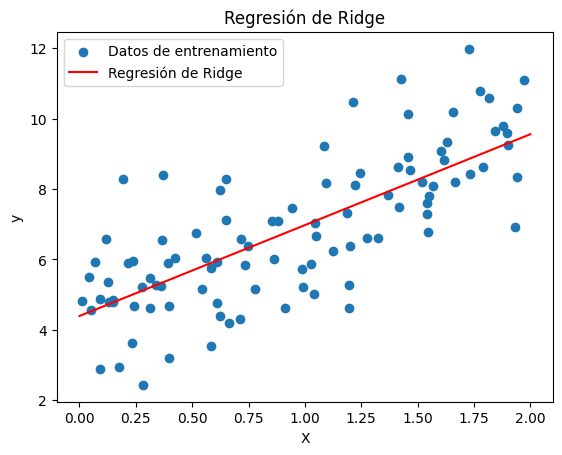

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Aplicar regresión de crestas
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

# Visualizar el ajuste del modelo
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = ridge_reg.predict(X_range)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_pred, color='red', label='Regresión de Ridge')
plt.title('Regresión de Ridge')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**4. Hiperparámetro $(\alpha)$:**

El parámetro $(\alpha)$ controla la fuerza de la regularización. Un $(\alpha)$ más grande conduce a una mayor regularización.

**5. Comparación con Regresión Lineal:**

La regresión de Ridge tiende a tener coeficientes más pequeños que la regresión lineal simple. La elección de $(\alpha)$ es crítica y debe ajustarse mediante validación cruzada.

Esta técnica es valiosa en situaciones donde hay características correlacionadas y puede mejorar el rendimiento del modelo al reducir la complejidad.

# **57. Regresión de lazo | Intuición y muestra de código | Modelos lineales regularizados**

La regresión de lazo, también conocida como regresión LASSO (Least Absolute Shrinkage and Selection Operator), es una técnica de regresión lineal regularizada que incorpora una penalización en la magnitud absoluta de los coeficientes del modelo. Al igual que en la regresión de crestas, el objetivo es prevenir el sobreajuste y realizar una selección de características. Aquí tienes una explicación detallada junto con un ejemplo en código y visualización.

**1. Concepto clave:**

En la regresión de lazo, además de minimizar la suma de los errores cuadráticos entre las predicciones del modelo y los valores reales, se agrega un término de penalización proporcional a la magnitud absoluta de los coeficientes del modelo. La función de costo de la regresión LASSO se define como:

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \alpha \sum_{j=1}^{n} |\theta_j|$

Donde:
- $J(\theta)$ es la función de costo.
- $(m)$ es el número de ejemplos de entrenamiento.
- $h_{\theta}(x^{(i)})$ es la predicción del modelo para el ejemplo $(i)$.
- $y^{(i)}$ es la etiqueta real del ejemplo $(i)$.
- $(\alpha)$ es el parámetro de regularización.
- $(\theta_j)$ son los coeficientes del modelo.

**2. Beneficios:**

- Previene el sobreajuste y realiza selección de características.
- Puede llevar algunos coeficientes a cero, actuando efectivamente como un selector de características.

**3. Ejemplo en código:**

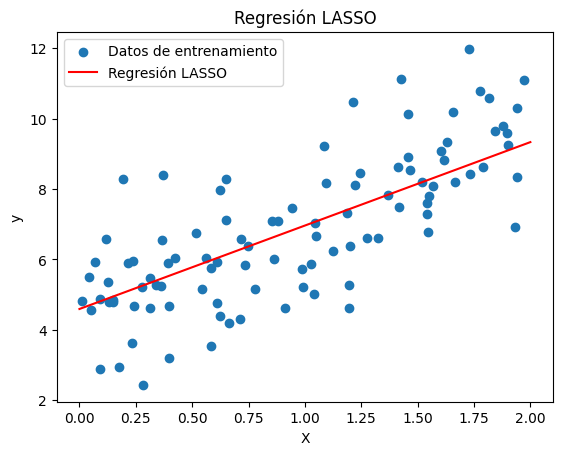

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Aplicar regresión LASSO
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

# Visualizar el ajuste del modelo
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = lasso_reg.predict(X_range)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_pred, color='red', label='Regresión LASSO')
plt.title('Regresión LASSO')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**4. Hiperparámetro $(\alpha)$:**

Al igual que en la regresión de crestas, el parámetro $(\alpha)$ controla la fuerza de la regularización. Un $(\alpha)$ más grande conduce a una mayor regularización.

**5. Comparación con Regresión Lineal:**

La regresión LASSO tiende a tener algunos coeficientes exactamente iguales a cero, por lo que también puede utilizarse como un método de selección de características.

Esta técnica es útil cuando se sospecha que solo un subconjunto de características es relevante para la tarea de predicción y se desea realizar una selección automática de características.

# **58. ¿Por qué Lasso Regression crea escasez?**

La regresión Lasso (Least Absolute Shrinkage and Selection Operator) es conocida por inducir escasez o sparsity en el modelo. Esto significa que algunos de los coeficientes de la regresión Lasso pueden volverse exactamente cero. La razón detrás de este comportamiento se encuentra en la función de penalización utilizada por Lasso, que incluye la suma de los valores absolutos de los coeficientes. A continuación, se proporciona una explicación detallada junto con un ejemplo en código y visualización.

**1. Función de Costo de Lasso:**

La función de costo de la regresión Lasso se define como:

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \alpha \sum_{j=1}^{n} |\theta_j|$

Donde:
- $J(\theta)$ es la función de costo.
- $(m)$ es el número de ejemplos de entrenamiento.
- $h_{\theta}(x^{(i)})$ es la predicción del modelo para el ejemplo $(i)$.
- $(y^{(i)})$ es la etiqueta real del ejemplo $(i)$.
- $(\alpha)$ es el parámetro de regularización.
- $(\theta_j)$ son los coeficientes del modelo.

**2. Término de Penalización en Valor Absoluto:**

El término de penalización $(\alpha \sum_{j=1}^{n} |\theta_j|)$ en la función de costo penaliza fuertemente los valores absolutos de los coeficientes. Cuando se minimiza esta función de costo, algunos coeficientes pueden volverse exactamente cero para minimizar la penalización total.

**3. Beneficios de la Escasez:**

- **Selección de Características Automática:** La regresión Lasso actúa como un selector automático de características, ya que puede forzar a algunos coeficientes a cero, eliminando así esas características del modelo.

**4. Ejemplo en Código y Visualización:**

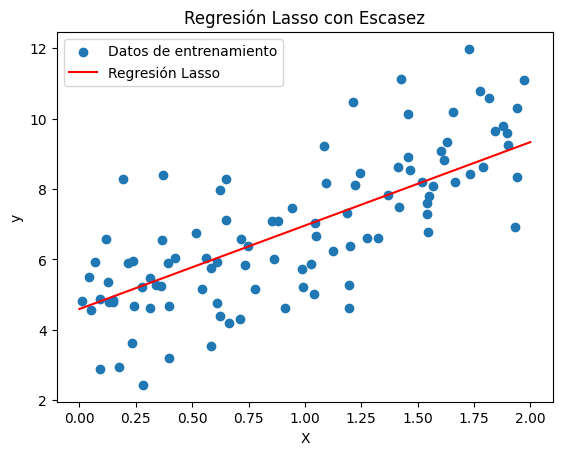

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Aplicar regresión Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

# Visualizar el ajuste del modelo
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = lasso_reg.predict(X_range)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_pred, color='red', label='Regresión Lasso')
plt.title('Regresión Lasso con Escasez')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**5. Interpretación:**

En el gráfico resultante, algunos coeficientes de la regresión Lasso pueden ser cero, lo que indica escasez en el modelo. Esto es especialmente útil en situaciones donde se sospecha que solo un subconjunto de características es relevante para la tarea de predicción.

# **59. Regresión ElasticNet | Ejemplo de intuición y código | Modelos lineales regularizados**

La regresión ElasticNet es una variante de la regresión lineal regularizada que combina las penalizaciones L1 (lasso) y L2 (ridge). Introduce dos parámetros de regularización, $(\alpha)$ y $(\rho)$, que controlan la fuerza de las penalizaciones L1 y L2, respectivamente. La función de costo de ElasticNet se define como:

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \alpha \left( \rho \sum_{j=1}^{n} |\theta_j| + \frac{1-\rho}{2} \sum_{j=1}^{n} \theta_j^2 \right)$

Donde:
- $J(\theta)$ es la función de costo.
- $(m)$ es el número de ejemplos de entrenamiento.
- $h_{\theta}(x^{(i)})$ es la predicción del modelo para el ejemplo $(i)$.
- $(y^{(i)})$ es la etiqueta real del ejemplo $(i)$.
- $(\alpha)$ es el parámetro de regularización total.
- $(\rho)$ es la proporción entre las penalizaciones L1 y L2.

A continuación, se presenta una explicación detallada con un ejemplo en código y visualización.

**Ejemplo en Código y Visualización:**

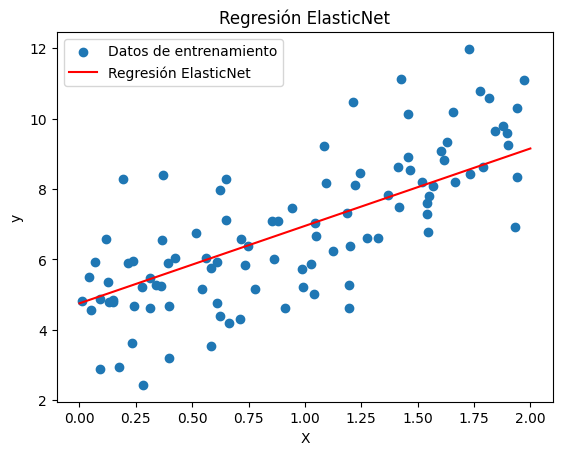

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Aplicar regresión ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controla la proporción entre L1 y L2
elastic_net.fit(X, y)

# Visualizar el ajuste del modelo
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = elastic_net.predict(X_range)

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_pred, color='red', label='Regresión ElasticNet')
plt.title('Regresión ElasticNet')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**Interpretación:**

- Al ajustar el parámetro `l1_ratio`, puedes controlar la proporción entre las penalizaciones L1 y L2. Un `l1_ratio` de 1 significa penalización pura de L1 (lasso), y un `l1_ratio` de 0 significa penalización pura de L2 (ridge).
- ElasticNet es útil cuando se tienen múltiples características correlacionadas, ya que L1 puede seleccionar automáticamente características y L2 puede manejar la correlación entre ellas.

Esta combinación de L1 y L2 proporciona flexibilidad y control adicional sobre la regularización en comparación con lasso o ridge por separado.

# **60. Regresión logística | Truco del perceptrón**

La regresión logística es un modelo utilizado para problemas de clasificación binaria. Aunque su nombre incluye la palabra "regresión", se emplea comúnmente en tareas de clasificación. La regresión logística utiliza la función logística para modelar la probabilidad de que una instancia pertenezca a una clase particular.

**Función Logística:**

La función logística (también conocida como función sigmoide) se define como:

$\sigma(t) = \frac{1}{1 + e^{-t}}$

Esta función tiene la propiedad de mapear cualquier número real $(t)$ a un rango entre 0 y 1. Su gráfica tiene forma de "S", lo que es útil para modelar probabilidades en problemas de clasificación binaria.

**Modelo de Regresión Logística:**

La regresión logística utiliza la función logística para modelar la probabilidad de que una instancia pertenezca a la clase positiva $(y=1). La probabilidad de la clase positiva se calcula como:

$P(y=1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b)$

Donde:
- $(P(y=1 | \mathbf{x}))$ es la probabilidad de que la instancia pertenezca a la clase positiva.
- $(\sigma(\cdot))$ es la función logística.
- $(\mathbf{w})$ es el vector de pesos.
- $(\mathbf{x})$ es el vector de características de la instancia.
- $(b)$ es el sesgo (también conocido como término de sesgo o intercepto).

**Entrenamiento del Modelo:**

El modelo se entrena ajustando los pesos $(\mathbf{w})$ y el sesgo $(b)$ para maximizar la probabilidad logarítmica de que el modelo prediga correctamente las etiquetas de entrenamiento.

**Ejemplo en Código y Visualización:**

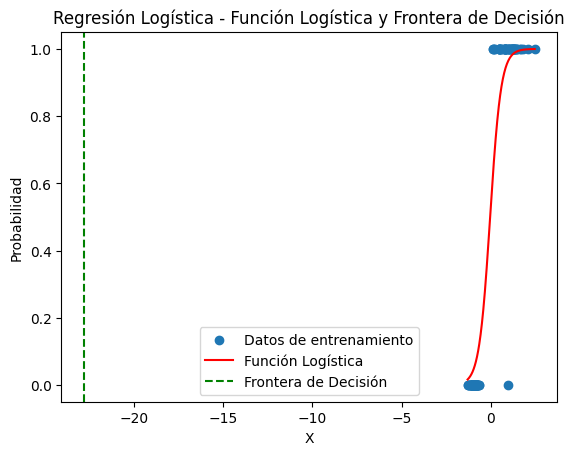

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Entrenar un modelo de regresión logística
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

# Visualizar la función logística y la frontera de decisión
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_range)[:, 1]

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_proba, color='red', label='Función Logística')
plt.axvline(log_reg.coef_[0, 0] / -log_reg.intercept_, color='green', linestyle='--', label='Frontera de Decisión')
plt.title('Regresión Logística - Función Logística y Frontera de Decisión')
plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

**Interpretación:**

- La línea verde en la gráfica representa la frontera de decisión, el punto donde la probabilidad predicha es igual a 0.5. En este ejemplo, se utiliza la ecuación de la recta para encontrar este punto.
- La función logística modela cómo las probabilidades cambian con respecto a la variable $(X)$.
- La regresión logística generaliza bien a problemas de clasificación binaria y es la base de muchos otros modelos más avanzados.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./5_Machine_Learning.ipynb)| [⏩](./7_Machine_Learning.ipynb)|